## PyCBC: Waveform Generation ##
 * Learn more about [PyCBC](https://ligo-cbc.github.io/)
 * Find more examples on our [documentation pages](https://github.com/ligo-cbc/pycbc)


### Try plotting a time-domain waveform ###

In [7]:
%matplotlib nbagg

import pylab
import numpy as np
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants

In [8]:
# List of td approximants that are available
print "Here is a list of potential time domain approximates:"
print td_approximants()

# List of fd approximants that are currently available
print fd_approximants()

Here is a list of potential time domain approximates:
['TaylorEt', 'SEOBNRv3_opt', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'EOBNRv2', 'SEOBNRv4_opt', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'NR_hdf5', 'SEOBNRv3_pert', 'EOBNRv2HM', 'SpinTaylorT4', 'TaylorT1', 'TaylorT3', 'TaylorT2', 'HGimri', 'TaylorT4', 'IMRPhenomD', 'IMRPhenomPv2', 'SEOBNRv1', 'SpinDominatedWf', 'SEOBNRv3', 'SEOBNRv2', 'SpinTaylorT1', 'SEOBNRv4', 'SpinTaylorT2', 'EccentricTD', 'SEOBNRv2_opt', 'SEOBNRv3_opt_rk4']
['TaylorF2', 'SEOBNRv2_ROM_EffectiveSpin', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'IMRPhenomD', 'SpinTaylorT2Fourier', 'IMRPhenomPv2_INTERP', 'SpinTaylorT4Fourier', 'IMRPhenomD_INTERP', 'SEOBNRv2_ROM_DoubleSpin', 'IMRPhenomP', 'SpinTaylorF2', 'SEOBNRv2_ROM_DoubleSpin_INTERP', 'SEOBNRv1_ROM_DoubleSpin_INTERP', 'TaylorF2_INTERP', 'SEOBNRv2_ROM_DoubleSpin_HI', 'SpinTaylorF2_INTERP', 'EOBNRv2_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'EccentricFD', 'SpinTaylorF2_SWAPPER_INTERP', 'SEOBNRv4_R

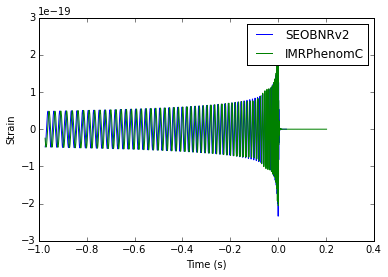

In [9]:

import pylab
import numpy as np
from pycbc.waveform import get_td_waveform, get_fd_waveform

for apx in ['SEOBNRv2', 'IMRPhenomC']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    pylab.plot(hp.sample_times, hp, label=apx)

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

['__abs__', '__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__div__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getitem__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__isub__', '__len__', '__module__', '__mul__', '__new__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_checkother', '_copy', '_data', '_delta_f', '_epoch', '_getslice', '_getvalue', '_icheckother', '_memoize_single', '_return', '_returnarray', '_returntype', '_saved', '_scheme', '_swighelper', '_typecheck', '_vcheckother', '_vrcheckother', 'abs_arg_max', 'abs_max_loc', 'almost_equal_elem', 'almost_equal_norm', 'astype', 'clear', 'conj', 'cumsum', 'data', 'delta_f', 'dot', 'dtype', 'epoch', 'fill', 'get_delta_f', 'get_epoch', 'get_sample_frequencies', 'imag', 'inner', 'itemsize', 'kind', 'lal', 'max', 'max_

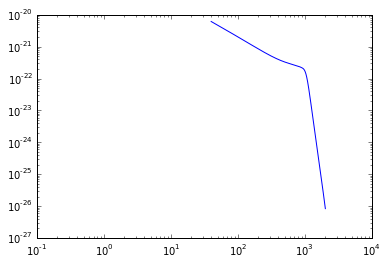

In [10]:
for apx in ['IMRPhenomPv2']:
    hp, hc = get_fd_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_f=1.0/10,
                                 f_lower=40)
    print(dir(hp))

    pylab.loglog(hp.sample_frequencies, np.abs(hp), label=apx)



In [11]:
help(get_td_waveform)

Help on function get_td_waveform in module pycbc.waveform.waveform:

get_td_waveform(template=None, **kwargs)
    Return the plus and cross polarizations of a time domain waveform.
    
    Parameters
    ----------
    template: object
        An object that has attached properties. This can be used to subsitute
        for keyword arguments. A common example would be a row in an xml table.
    mass1 : {None, float}
        The mass of the first component object in the binary (in solar masses).
    mass2 : {None, float}
        The mass of the second component object in the binary (in solar masses).
    spin1x : {0.0, float}
        The x component of the first binary component's dimensionless spin.
    spin1y : {0.0, float}
        The y component of the first binary component's dimensionless spin.
    spin1z : {0.0, float}
        The z component of the first binary component's dimensionless spin.
    spin2x : {0.0, float}
        The x component of the second binary component's dim

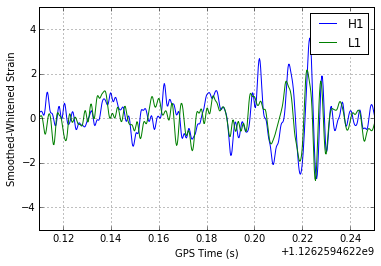

In [12]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate

for ifo in ['H1', 'L1']:
    # Read data: The data is available to the public through losc.ligo.org!
    fname = '%s-%s_LOSC_4_V2-1126259446-32.gwf' % (ifo[0], ifo)
    ts = read_frame(fname, '%s:LOSC-STRAIN' % ifo)
    
    # Remove low frequency content
    ts = highpass_fir(ts, 15, 8)

    # Calculate the noise spectrum and use it to whiten the data
    psd = interpolate(welch(ts), 1.0 / ts.duration)
    white_strain = (ts.to_frequencyseries() / psd ** 0.5 * psd.delta_f).to_timeseries()

    # remove frequencies below and above where the main portion of the signal lies
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(smooth, 300, 8)

    # time shift and flip L1 to match the time of arrival and phase of Hanford
    if ifo == 'L1':
        smooth *= -1
        smooth.roll(int(.007 / smooth.delta_t))

    pylab.plot(smooth.sample_times.numpy(), smooth.numpy(), label=ifo)

# Plot the region around the signal (time is in gps seconds)
pylab.legend()
pylab.xlim(1126259462.31, 1126259462.45)
pylab.ylabel('Smoothed-Whitened Strain')
pylab.grid()
pylab.ylim(-5, 5)
pylab.xlabel('GPS Time (s)')
pylab.show()